## Business Understanding

### Business Objective
Welcome to the world of Chipchoco, a passionate startup aiming to become a leader in the chocolate bar production and sales industry. As a company committed to creating top-quality chocolate bars, Chipchoco faces a challenge: understanding the key features that contribute to the high ratings of top-quality chocolate bars. By unraveling this mystery, Chipchoco seeks to produce exceptional chocolate bars that delight customers and earn them a coveted place among the finest chocolatiers.

### Data Reqirements
Year of Review (year_reviewed): This column would represent the year in which the chocolate bars were reviewed or rated. It will serve as the x-axis or time dimension for your analysis.

Rating (rating): This column would contain the ratings assigned to the chocolate bars. These ratings could be numerical values, such as stars or scores, indicating the quality or satisfaction level of the chocolate bars.

Other Relevant Columns: For this project, We will need additional column that could affect chocolate bar ratings, such as the manufacturer, cocoa percentage, ingredients, country of origin, etc.

### Project Requirement
- Prepare data for project.
- Develop hypothesis and analytical questions.
- Exploratory data analysis & data cleaning.
- Answer analytical questions with visualizations.

## Hypothesis

**H0: The number of ingridients in a chocolate bar has no impact on it's rating**

**H1: The number of ingridents in a chocolate bar has an impact on it's rating**

## Analytical Questions
1. Who are the top 10 manufacturers
2. Which Countries have the Highest Consumer Rating (Top 10)
3. How Have Chocolate Bar Ratings Evolved Over Time (Average)
4. What is the effect of Year Reviewed on Rating
5. Which Chocolate Bars had the highest Cocoa Percentage (Top 5)
6. Which Chocolate Bars had the most Number of Ingredients (Top 5)

## Python Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib

import warnings
warnings.filterwarnings('ignore')

plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

# To disable the warning that pandas generates when performing chained assignments.
pd.options.mode.chained_assignment = None

# To display max rows and columns
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

from sklearn.impute import SimpleImputer
from scipy import stats
from scipy.stats import levene, kruskal, shapiro
import plotly.graph_objects as go

## Let's load the data

### Top five rows of the data

In [2]:
df = pd.read_csv("chocolate_bars.csv")
df.head()

,id,manufacturer,company_location,year_reviewed,bean_origin,bar_name,cocoa_percent,num_ingredients,ingredients,review,rating
0,2454,5150,U.S.A.,2019,Tanzania,"Kokoa Kamili, batch 1",76.0,3.0,"B,S,C","rich cocoa, fatty, bready",3.25
1,2458,5150,U.S.A.,2019,Dominican Republic,"Zorzal, batch 1",76.0,3.0,"B,S,C","cocoa, vegetal, savory",3.50
2,2454,5150,U.S.A.,2019,Madagascar,"Bejofo Estate, batch 1",76.0,3.0,"B,S,C","cocoa, blackberry, full body",3.75
3,2542,5150,U.S.A.,2021,Fiji,"Matasawalevu, batch 1",68.0,3.0,"B,S,C","chewy, off, rubbery",3.00
4,2546,5150,U.S.A.,2021,Venezuela,"Sur del Lago, batch 1",72.0,3.0,"B,S,C","fatty, earthy, moss, nutty,chalky",3.00


## Data Understanding

### Data Source
The **chocolate_bars.csv** is located on [Kaggle](https://www.kaggle.com/datasets/evangower/chocolate-bar-ratings)

### Data Description
- **id** Id number of the review
- **manufacturer** Name of the chocolate bar manufacturer
- **company_location** Location of manufacturer
- **year_reviewed** The year of review
- **bean_origin** Country of origin of the cacao beans
- **bar_name** Name of chocolate bar
- **cocoa_percent** Cocoa content of the chocolate bar (%)
- **num_ingredients** Number of ingredients in chocolate bar
- **ingredients** Ingredients used
- **rating** Rating of the chocolate bar
- **review** Summary of most memorable characteristics of the chocolate bar.

## Exploratory Data Analysis: EDA

Lets have a look at the loaded datsets

In [3]:
df.head()

,id,manufacturer,company_location,year_reviewed,bean_origin,bar_name,cocoa_percent,num_ingredients,ingredients,review,rating
0,2454,5150,U.S.A.,2019,Tanzania,"Kokoa Kamili, batch 1",76.0,3.0,"B,S,C","rich cocoa, fatty, bready",3.25
1,2458,5150,U.S.A.,2019,Dominican Republic,"Zorzal, batch 1",76.0,3.0,"B,S,C","cocoa, vegetal, savory",3.50
2,2454,5150,U.S.A.,2019,Madagascar,"Bejofo Estate, batch 1",76.0,3.0,"B,S,C","cocoa, blackberry, full body",3.75
3,2542,5150,U.S.A.,2021,Fiji,"Matasawalevu, batch 1",68.0,3.0,"B,S,C","chewy, off, rubbery",3.00
4,2546,5150,U.S.A.,2021,Venezuela,"Sur del Lago, batch 1",72.0,3.0,"B,S,C","fatty, earthy, moss, nutty,chalky",3.00


The info() method is a quick way to get description of the data, it shows the total number of rows, each attributes data type and Non-Null Count.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2530 entries, 0 to 2529
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                2530 non-null   int64  
 1   manufacturer      2530 non-null   object 
 2   company_location  2530 non-null   object 
 3   year_reviewed     2530 non-null   int64  
 4   bean_origin       2530 non-null   object 
 5   bar_name          2530 non-null   object 
 6   cocoa_percent     2530 non-null   float64
 7   num_ingredients   2443 non-null   float64
 8   ingredients       2443 non-null   object 
 9   review            2530 non-null   object 
 10  rating            2530 non-null   float64
dtypes: float64(3), int64(2), object(6)
memory usage: 217.5+ KB


- The DataFrame has a total of 2530 entries (rows) and 11 columns.
- The columns in the DataFrame are named 'id', 'manufacturer', 'company_location', 'year_reviewed', 'bean_origin', 'bar_name', 'cocoa_percent', 'num_ingredients', 'ingredients', 'review', and 'rating'.
- The 'id', 'manufacturer', 'company_location', and 'year_reviewed' columns are of integer data type (int64).
- The 'bean_origin', 'bar_name', 'ingredients', and 'review' columns are of object data type (string).
- The 'cocoa_percent', 'num_ingredients', and 'rating' columns are of float data type (float64).
- The 'num_ingredients' column and the 'ingredients' column have some missing values (non-null count is less than the total number of entries).
- The memory usage of the DataFrame is approximately 217.5 KB.

This information provides a summary of the data types and missing values present in each column of the DataFrame. It gives an overview of the structure and composition of the DataFrame, which can help in further data exploration and analysis.

The code block below allows us to loop through the data and see if there is anything missing

In [5]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

id - 0%
manufacturer - 0%
company_location - 0%
year_reviewed - 0%
bean_origin - 0%
bar_name - 0%
cocoa_percent - 0%
num_ingredients - 3%
ingredients - 3%
review - 0%
rating - 0%


- The 'id', 'manufacturer', 'company_location', 'year_reviewed', 'bean_origin', 'bar_name', 'cocoa_percent', 'review', and 'rating' columns have no missing values (0% missing).
- The 'num_ingredients' and 'ingredients' columns have 3% missing values each.

This output informs us that the proportion of missing values in each column of the DataFrame. It indicates that the 'num_ingredients' and 'ingredients' columns have some missing data, with approximately 3% of values being absent.

## Univerate Analysis

In [6]:
df.describe()

,id,year_reviewed,cocoa_percent,num_ingredients,rating
count,2530.000000,2530.000000,2530.000000,2443.000000,2530.000000
mean,1429.800791,2014.374308,71.639723,3.041343,3.196344
std,757.648556,3.968267,5.616724,0.913728,0.445321
min,5.000000,2006.000000,42.000000,1.000000,1.000000
25%,802.000000,2012.000000,70.000000,2.000000,3.000000
50%,1454.000000,2015.000000,70.000000,3.000000,3.250000
75%,2079.000000,2018.000000,74.000000,4.000000,3.500000
max,2712.000000,2021.000000,100.000000,6.000000,4.000000


In [7]:
def calculate_median_mean(dataframe):
    # Calculate median and mean for each column
    medians = dataframe.median()
    means = dataframe.mean()

    # Create a new DataFrame to store the results
    result_df = pd.DataFrame({'Median': medians, 'Mean': means})

    return result_df
result = calculate_median_mean(df)
result["dif"] = round((result["Median"]-result["Mean"])**2, 3)
result

,Median,Mean,dif
id,1454.00,1429.800791,585.602
year_reviewed,2015.00,2014.374308,0.391
cocoa_percent,70.00,71.639723,2.689
num_ingredients,3.00,3.041343,0.002
rating,3.25,3.196344,0.003


The describe() methods shows a summary of the numerical fields

- count: Represents the number of non-null values in each column.
- mean: Indicates the average value of each column.
- std: Represents the standard deviation, which measures the dispersion or spread of values around the mean.
- min: Specifies the minimum value observed in each column.
- 25%: Represents the first quartile or the 25th percentile, indicating the value below which 25% of the data falls.
- 50%: Represents the second quartile or the median, which divides the data into two equal halves.
- 75%: Represents the third quartile or the 75th percentile, indicating the value below which 75% of the data falls.
- max: Specifies the maximum value observed in each column.

Now, let's interpret the output for each column:

id: The 'id' column range is from 5 to 2712, with a mean of approximately 1429.8.
year_reviewed: The 'year_reviewed' column range is from 2006 to 2021, with a mean of approximately 2014.37.
cocoa_percent: The 'cocoa_percent' column range is from 42 to 100, with a mean of approximately 71.64.
num_ingredients: The 'num_ingredients' column range is from 1 to 6, with a mean of approximately 3.04. There are missing values (count is 2443 instead of 2530).
rating: The 'rating' column range is from 1 to 4, with a mean of approximately 3.20.

These summary statistics provide a high-level overview of the distribution and central tendency of each numerical column in the DataFrame. They help to understand the range, variation, and general patterns within the data.

Check for duplicates

In [8]:
df.duplicated().any()

False

Let's remove the incorrect value in the manufcturer's name column.

Since its not clear 5150 is a manufacturer name or an error let's make it a Null value so it can be removed along side other null values that will be removed.

In [9]:
df["manufacturer"] = df["manufacturer"].replace("5150",np.nan)

In [10]:
df.columns

Index(['id', 'manufacturer', 'company_location', 'year_reviewed',
       'bean_origin', 'bar_name', 'cocoa_percent', 'num_ingredients',
       'ingredients', 'review', 'rating'],
      dtype='object')

In [11]:
cat_col = ['manufacturer', 'company_location', 'bean_origin', 'bar_name', 'ingredients', 'review']
num_col = ["id", "year_reviewed","cocoa_percent", "num_ingredients", "rating"]

In [12]:
num_im = SimpleImputer(strategy="mean").fit(df[num_col])
cat_im = SimpleImputer(strategy = "most_frequent").fit(df[cat_col])

In [13]:
adf = pd.DataFrame(num_im.transform(df[num_col]), columns=num_col)
bdf = pd.DataFrame(cat_im.transform(df[cat_col]), columns=cat_col)

In [14]:
adf[cat_col] = bdf[cat_col]

In [15]:
adf.head()

,id,year_reviewed,cocoa_percent,num_ingredients,rating,manufacturer,company_location,bean_origin,bar_name,ingredients,review
0,2454.0,2019.0,76.0,3.0,3.25,Soma,U.S.A.,Tanzania,"Kokoa Kamili, batch 1","B,S,C","rich cocoa, fatty, bready"
1,2458.0,2019.0,76.0,3.0,3.50,Soma,U.S.A.,Dominican Republic,"Zorzal, batch 1","B,S,C","cocoa, vegetal, savory"
2,2454.0,2019.0,76.0,3.0,3.75,Soma,U.S.A.,Madagascar,"Bejofo Estate, batch 1","B,S,C","cocoa, blackberry, full body"
3,2542.0,2021.0,68.0,3.0,3.00,Soma,U.S.A.,Fiji,"Matasawalevu, batch 1","B,S,C","chewy, off, rubbery"
4,2546.0,2021.0,72.0,3.0,3.00,Soma,U.S.A.,Venezuela,"Sur del Lago, batch 1","B,S,C","fatty, earthy, moss, nutty,chalky"


Let's fill Null values in the num_ingredients column with its mean

only 3% of the the coulmn is missing filling in missing values with the mean of the column will have no significant effect on the analysis.

Dropping Null values with the dropna() method

**code below checks if there are any NULL values left**

In [16]:
adf.isnull().sum()

id                  0
year_reviewed       0
cocoa_percent       0
num_ingredients     0
rating              0
manufacturer        0
company_location    0
bean_origin         0
bar_name            0
ingredients         0
review              0
dtype: int64

Hurrah! we have gotten rid of the empty values in the best way possible!

Here we are assigning the rating system to a column based on rating

In [17]:
rs = []
dr = df.rating
for rw in dr:
    if rw == 5.0:
        rs.append("elite")
    elif rw >= 4.0:
        rs.append("premium")
    elif rw >= 3.75:
        rs.append("praiseworthy")
    elif rw >= 3.0:
        rs.append("satisfactory")
    elif rw >= 2.0:
        rs.append("disappointing")
    else:
        rs.append("unpleasant")
df["rating_system"] = rs

Flavors of Cacao Rating System: 
- 5 = Elite (Transcending beyond the ordinary limits) 
- 4 = Premium (Superior flavor development, character and style) 
- 3 = Satisfactory(3.0) to praiseworthy(3.75) (well made with special qualities) 
- 2 = Disappointing (Passable but contains at least one significant flaw) 
- 1 = Unpleasant (mostly unpalatable)

**A quick look at the data again after adding the rating_system column**

In [18]:
df.head()

,id,manufacturer,company_location,year_reviewed,bean_origin,bar_name,cocoa_percent,num_ingredients,ingredients,review,rating,rating_system
0,2454,NaN,U.S.A.,2019,Tanzania,"Kokoa Kamili, batch 1",76.0,3.0,"B,S,C","rich cocoa, fatty, bready",3.25,satisfactory
1,2458,NaN,U.S.A.,2019,Dominican Republic,"Zorzal, batch 1",76.0,3.0,"B,S,C","cocoa, vegetal, savory",3.50,satisfactory
2,2454,NaN,U.S.A.,2019,Madagascar,"Bejofo Estate, batch 1",76.0,3.0,"B,S,C","cocoa, blackberry, full body",3.75,praiseworthy
3,2542,NaN,U.S.A.,2021,Fiji,"Matasawalevu, batch 1",68.0,3.0,"B,S,C","chewy, off, rubbery",3.00,satisfactory
4,2546,NaN,U.S.A.,2021,Venezuela,"Sur del Lago, batch 1",72.0,3.0,"B,S,C","fatty, earthy, moss, nutty,chalky",3.00,satisfactory


## Multiverate Analysis

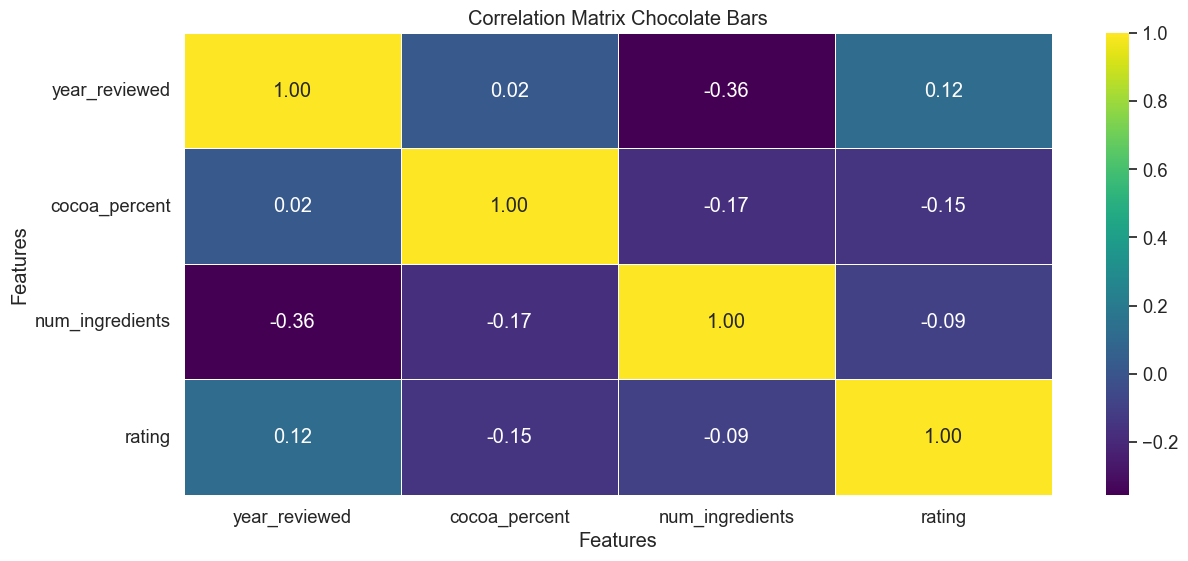

In [19]:
columns_to_visualize = ["year_reviewed", "cocoa_percent", "num_ingredients", "rating"]
correlation_matrix = adf[columns_to_visualize].corr(method='pearson')

# Create the Heatmap using Seaborn
plt.figure(figsize=(14, 6))
sns.set(font_scale=1.2)
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f", linewidths=.5)
plt.title("Correlation Matrix Chocolate Bars")
plt.xlabel("Features")
plt.ylabel("Features")
plt.show()

To test the hypothesis regarding the impact of the number of ingredients on the rating of a chocolate bar, you can perform a statistical test. A suitable test for this scenario is a hypothesis test based on the correlation coefficient between the number of ingredients and the ratings.

Since you want to test if there is an impact (either positive or negative) of the number of ingredients on the rating, we can use the Pearson correlation coefficient to quantify the strength and direction of the linear relationship between these two variables.

Here are the steps to test the hypothesis using Python:

Calculate the Pearson correlation coefficient between "num_ingredients" and "rating" in your DataFrame (adf).

Perform a hypothesis test using the correlation coefficient to determine if it is statistically significant.

Based on the significance level and the p-value obtained from the test, make a decision whether to reject or fail to reject the null hypothesis.

## Pearsonr Test

In [20]:
import pandas as pd
from scipy.stats import pearsonr

# Assuming you have already defined adf and it contains "num_ingredients" and "rating" columns.
num_ingredients = adf["num_ingredients"]
rating = adf["rating"]

# Calculate the Pearson correlation coefficient and its p-value
correlation_coefficient, p_value = pearsonr(num_ingredients, rating)

# Format the correlation coefficient and p-value to 4 decimal places
formatted_correlation = "{:.4f}".format(correlation_coefficient)
formatted_p_value = "{:.7f}".format(p_value)

# Define the significance level (commonly denoted by alpha)
alpha = 0.05

# Print the formatted correlation coefficient and p-value
print("Pearson Correlation Coefficient:", formatted_correlation)
print("P-value:", formatted_p_value)

# Perform the hypothesis test
if float(formatted_p_value) < alpha:
    print("Reject the null hypothesis (H0). The number of ingredients has an impact on the rating.")
else:
    print("Fail to reject the null hypothesis (H0). There is no sufficient evidence to suggest that the number of ingredients has an impact on the rating.")

Pearson Correlation Coefficient: -0.0934
P-value: 0.0000025
Reject the null hypothesis (H0). The number of ingredients has an impact on the rating.


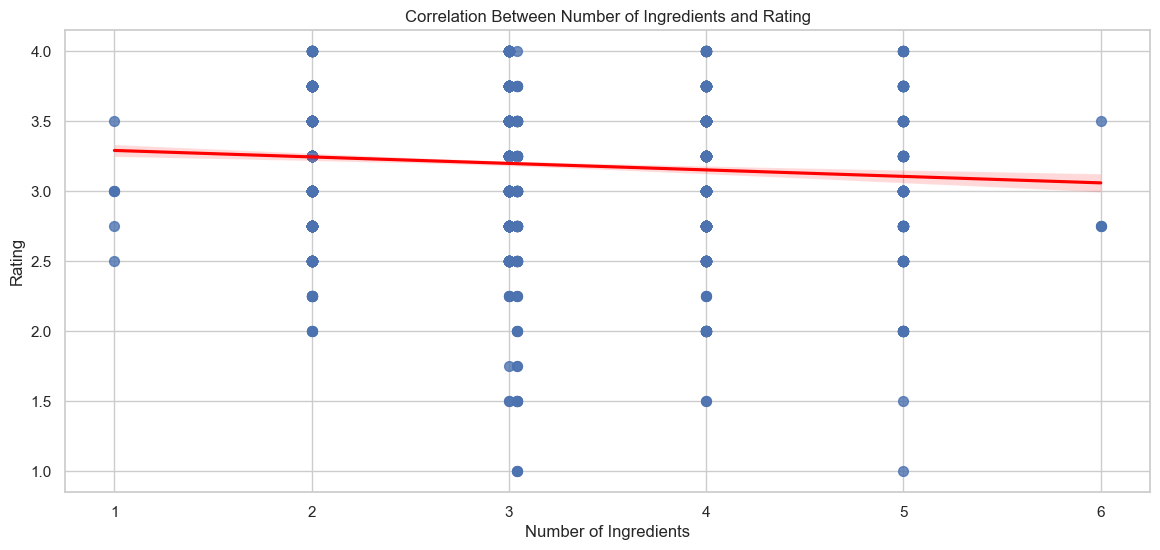

In [29]:
num_ingredients = adf["num_ingredients"]
rating = adf["rating"]

# Calculate the Pearson correlation coefficient
correlation_coefficient, _ = pearsonr(num_ingredients, rating)

# Format the correlation coefficient to 4 decimal places
formatted_correlation = "{:.4f}".format(correlation_coefficient)

# Create the scatter plot with a linear regression line
plt.figure(figsize=(14, 6))
sns.set(style="whitegrid")
sns.regplot(x=num_ingredients, y=rating, scatter_kws={'s': 50}, line_kws={'color': 'red'})
plt.title("Correlation Between Number of Ingredients and Rating")
plt.xlabel("Number of Ingredients")
plt.ylabel("Rating")

# Add the Pearson correlation coefficient as an annotation
plt.annotate(f"Pearson Correlation: {formatted_correlation}", xy=(1, 9), fontsize=12, color='blue')

# Show the plot
plt.show()

Based on the analysis of the data, we find a weak negative correlation (-0.0934) between the number of ingredients in a chocolate bar and its rating. The very small p-value (0.0000025) suggests that this correlation is statistically significant at a significance level of 0.05. Therefore, we reject the null hypothesis (H0) and conclude that there is a statistically significant impact of the number of ingredients on the rating of chocolate bars. However, it is essential to note that the correlation is weak, so while there is a statistically significant relationship, the practical significance or practical impact of the number of ingredients on the rating may be minimal.

#### Let's meet the top manufacturers

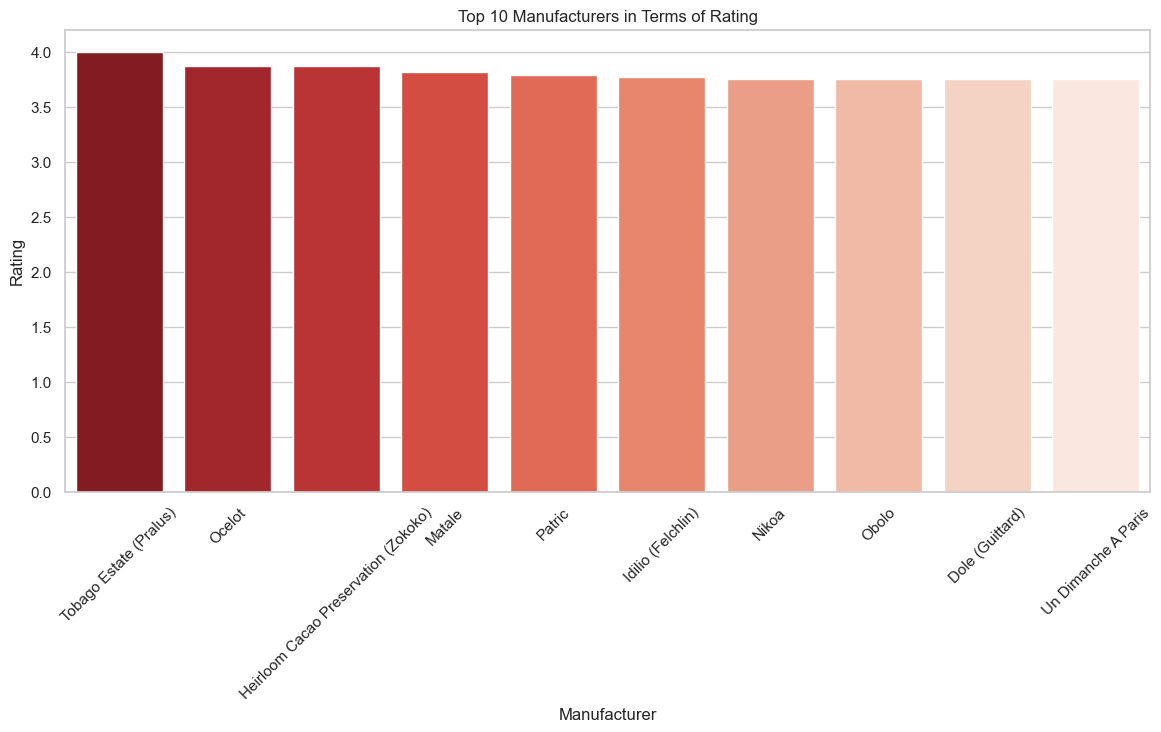

In [22]:
top_manufacturers = df.groupby("manufacturer")["rating"].mean().sort_values(ascending=False).head(10).reset_index()

# Create the bar chart using Seaborn
plt.figure(figsize=(14, 6))
sns.set(style="whitegrid")
sns.barplot(x="manufacturer", y="rating", data=top_manufacturers, palette="Reds_r")
plt.title("Top 10 Manufacturers in Terms of Rating")
plt.xlabel("Manufacturer")
plt.ylabel("Rating")
plt.xticks(rotation=45)

# Show the plot
plt.show()

In [23]:
top_movies = adf[["manufacturer", "rating", "company_location"]].groupby(["manufacturer"]).mean().reset_index().sort_values(by="rating",ascending=False).head(3)
top_movies

,manufacturer,rating
527,Tobago Estate (Pralus),4.000
402,Ocelot,3.875
254,Heirloom Cacao Preservation (Zokoko),3.875


The data shows the average ratings for three chocolate bar manufacturers. The manufacturer "Tobago Estate (Pralus)" has the highest average rating of 4.000, indicating that, on average, their chocolate bars receive higher ratings compared to the other manufacturers in the dataset.

On the other hand, the manufacturers "Ocelot" and "Heirloom Cacao Preservation (Zokoko)" both have the same average rating of 3.875, which is slightly lower than that of "Tobago Estate (Pralus)." This suggests that the chocolate bars produced by these two manufacturers also receive favorable ratings but are slightly lower on average compared to "Tobago Estate (Pralus)."

Overall, the data indicates that "Tobago Estate (Pralus)" stands out as the manufacturer with the highest average rating among the three, while "Ocelot" and "Heirloom Cacao Preservation (Zokoko)" have similar ratings but slightly lower than the top-rated manufacturer.

#### Let's take a tour of the countries and see the rating of each location

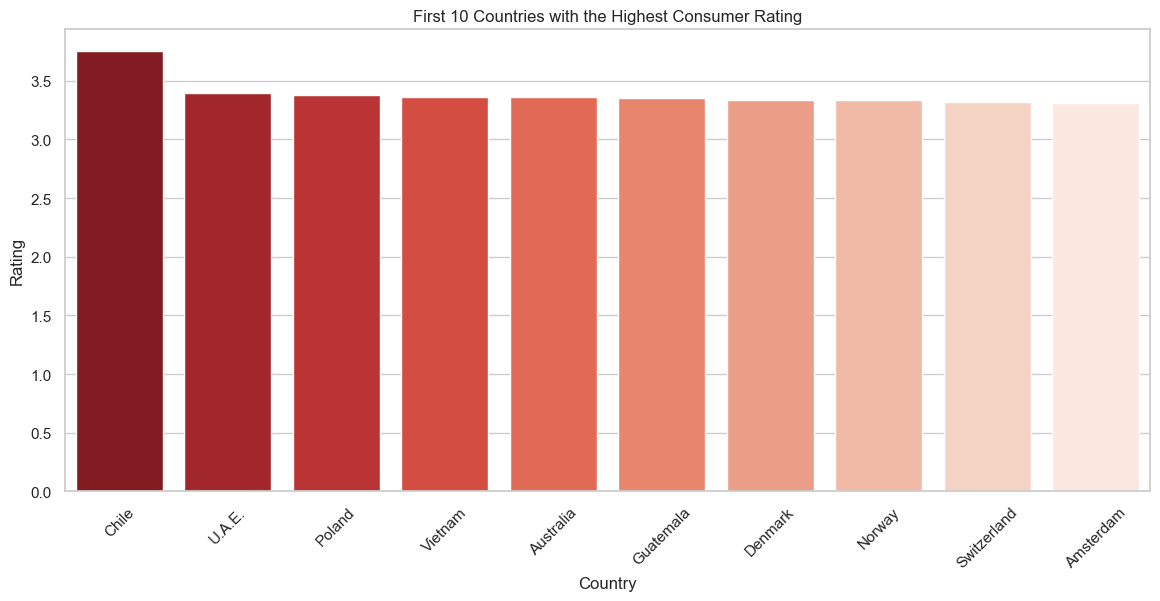

In [24]:
top_countries = adf.groupby("company_location")["rating"].mean().sort_values(ascending=False).head(10).reset_index()

# Create the bar chart using Seaborn
plt.figure(figsize=(14, 6))
sns.set(style="whitegrid")
sns.barplot(x="company_location", y="rating", data=top_countries, palette="Reds_r")
plt.title("First 10 Countries with the Highest Consumer Rating")
plt.xlabel("Country")
plt.ylabel("Rating")
plt.xticks(rotation=45)

# Show the plot
plt.show()

In [25]:
top_countries = adf[["company_location", "rating"]].groupby("company_location").mean().reset_index().sort_values(by="rating",ascending=False).head(10)
top_countries.head()

,company_location,rating
8,Chile,3.750000
60,U.A.E.,3.400000
42,Poland,3.375000
65,Vietnam,3.359375
2,Australia,3.358491


The data shows the average consumer ratings for chocolate bars from five different countries. Among these countries, Chile has the highest average consumer rating of 3.750, indicating that, on average, chocolate bars from Chile receive the highest ratings compared to the other countries listed.

Following Chile, the next highest average consumer ratings are observed in U.A.E. (3.400) and Poland (3.375), although they are slightly lower than the top-rated country.

Vietnam and Australia complete the list, with average consumer ratings of 3.359 and 3.358, respectively.

Overall, this data suggests that Chile stands out as the country with the highest average consumer rating among the listed countries, while U.A.E., Poland, Vietnam, and Australia also receive favorable average ratings for their chocolate bars but at slightly lower levels compared to Chile.

#### Let's embark on a journey through time and explore the evolution of chocolate bar ratings over the years.

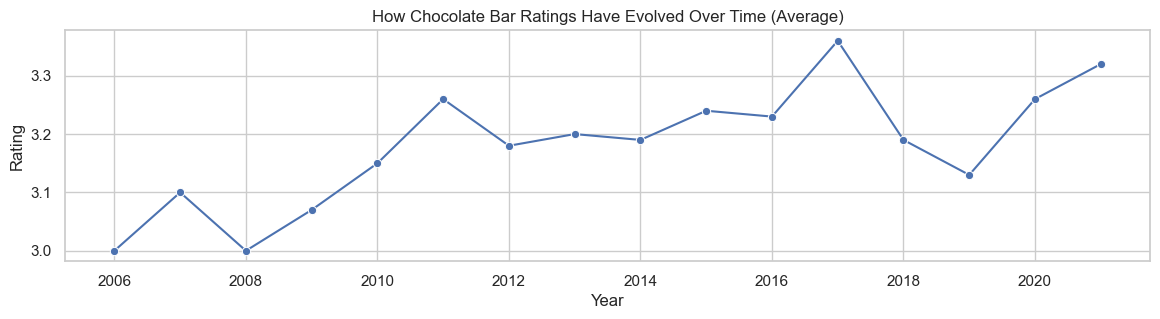

In [26]:
top_years = df.groupby("year_reviewed")["rating"].mean().round(2).sort_values(ascending=False).reset_index()

# Create the line plot using Seaborn
plt.figure(figsize=(14, 3))
sns.set(style="whitegrid")
sns.lineplot(x="year_reviewed", y="rating", data=top_years, marker='o')
plt.title("How Chocolate Bar Ratings Have Evolved Over Time (Average)")
plt.xlabel("Year")
plt.ylabel("Rating")

# Show the plot
plt.show()

In [27]:
top_movies = adf[["year_reviewed", "rating"]].groupby("year_reviewed").mean().reset_index().sort_values(by="rating",ascending=False).head()
top_movies["year_reviewed"] = top_movies["year_reviewed"].astype(int)
top_movies["rating"] = top_movies["rating"].round(3)
top_movies

,year_reviewed,rating
11,2017,3.362
15,2021,3.320
5,2011,3.258
14,2020,3.256
9,2015,3.245


So we when back in time and obserevd the rise and fall of the ratings till present day. Looking at the line graph it's obvious ratings rose over time on the average. 2017 with a rating of 3.36 though the higest kind of looks like an anomaly, the reason for the spike may be checked later. we can also go into the furture to predict if the ratings will continue to increase or drop, but we will not be travelling into the future in this research.

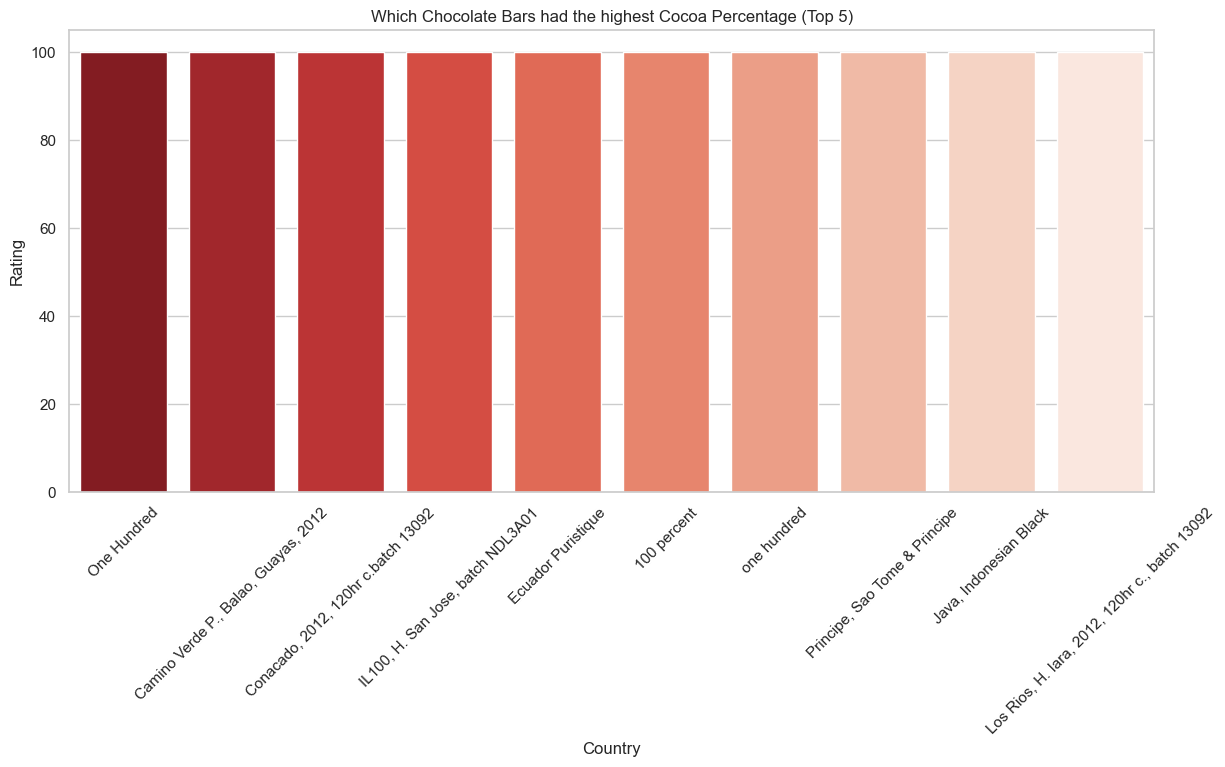

In [30]:
top_bars = adf.groupby("bar_name")["cocoa_percent"].mean().sort_values(ascending=False).head(10).reset_index()

# Create the bar chart using Seaborn
plt.figure(figsize=(14, 6))
sns.set(style="whitegrid")
sns.barplot(x="bar_name", y="cocoa_percent", data=top_bars, palette="Reds_r")
plt.title("Which Chocolate Bars had the highest Cocoa Percentage (Top 5)")
plt.xlabel("Country")
plt.ylabel("Rating")
plt.xticks(rotation=45)

# Show the plot
plt.show()

In [31]:
top_bars.head()

,bar_name,cocoa_percent
0,One Hundred,100.0
1,"Camino Verde P., Balao, Guayas, 2012",100.0
2,"Conacado, 2012, 120hr c.batch 13092",100.0
3,"IL100, H. San Jose, batch NDL3A01",100.0
4,Ecuador Puristique,100.0
